In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive #toimport google drive data

In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Mounted at /content/drive


In [2]:
cd /content/drive/"My Drive/ML-Project"

[Errno 2] No such file or directory: '/content/drive/My Drive/ML-Project'
/content


In [ ]:
df = pd.read_csv('Kaggle_Training_Dataset_v2.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [ ]:
print("df shape:",df.shape)

df shape: (1687861, 23)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
new_column_names = ['product_id', 'current_inventory', 'transit_duration', 'transit_quantity',
                   'forecast_sales_3_months', 'forecast_sales_6_months', 'forecast_sales_9_months',
                   'prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                   'prior_sales_9_month', 'minimum_recommend_stock', 'source_has_issue',
                   'source_overdue', 'source_performance_6_months', 'source_performance_12_months',
                   'stock_overdue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy',
                   'rev_stop', 'went_on_backorder']

df.columns = new_column_names
df.describe()

,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [ ]:
df.describe(include = ['object'])

,product_id,source_has_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3281675,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [ ]:
df.isnull()

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1687857,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1687858,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1687859,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

product_id                           0
current_inventory                    1
transit_duration                100894
transit_quantity                     1
forecast_sales_3_months              1
forecast_sales_6_months              1
forecast_sales_9_months              1
prior_sales_1_month                  1
prior_sales_3_month                  1
prior_sales_6_month                  1
prior_sales_9_month                  1
minimum_recommend_stock              1
source_has_issue                     1
source_overdue                       1
source_performance_6_months          1
source_performance_12_months         1
stock_overdue                        1
deck_risk                            1
oe_constraint                        1
ppap_risk                            1
stop_auto_buy                        1
rev_stop                             1
went_on_backorder                    1
dtype: int64

In [ ]:
df[df.current_inventory.isnull()]

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop([1687860], inplace = True)


KeyError: ignored

In [ ]:
df

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [ ]:
df.isnull().sum()

product_id                           0
current_inventory                    0
transit_duration                100893
transit_quantity                     0
forecast_sales_3_months              0
forecast_sales_6_months              0
forecast_sales_9_months              0
prior_sales_1_month                  0
prior_sales_3_month                  0
prior_sales_6_month                  0
prior_sales_9_month                  0
minimum_recommend_stock              0
source_has_issue                     0
source_overdue                       0
source_performance_6_months          0
source_performance_12_months         0
stock_overdue                        0
deck_risk                            0
oe_constraint                        0
ppap_risk                            0
stop_auto_buy                        0
rev_stop                             0
went_on_backorder                    0
dtype: int64

In [ ]:
df.product_id = df.product_id.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   product_id                    1687860 non-null  int64  
 1   current_inventory             1687860 non-null  float64
 2   transit_duration              1586967 non-null  float64
 3   transit_quantity              1687860 non-null  float64
 4   forecast_sales_3_months       1687860 non-null  float64
 5   forecast_sales_6_months       1687860 non-null  float64
 6   forecast_sales_9_months       1687860 non-null  float64
 7   prior_sales_1_month           1687860 non-null  float64
 8   prior_sales_3_month           1687860 non-null  float64
 9   prior_sales_6_month           1687860 non-null  float64
 10  prior_sales_9_month           1687860 non-null  float64
 11  minimum_recommend_stock       1687860 non-null  float64
 12  source_has_issue            

In [ ]:
#Handling NAN and Missing Values

In [ ]:
df.transit_duration.isnull().sum()

100893

In [ ]:
# Percentage of "Transit duration" data missing 

100893*100/len(df.index)

5.9775692296754475

In [ ]:
# Total missing values of "source_performance_6_months"

print(len(df[df['source_performance_6_months']==-99]))

129478


In [ ]:
# Pe# Percent of missing values

print(len(df[df['source_performance_6_months']==-99])*100/len(df.index))

7.671133861813184


In [ ]:
# Total missing values of "source_performance_12_months"

print(len(df[df['source_performance_12_months']==-99]))

122050


In [ ]:
# Percent of missing values

print(len(df[df['source_performance_12_months']==-99])*100/len(df.index))

7.231049968599291


In [ ]:
#

In [ ]:
#

In [ ]:
#

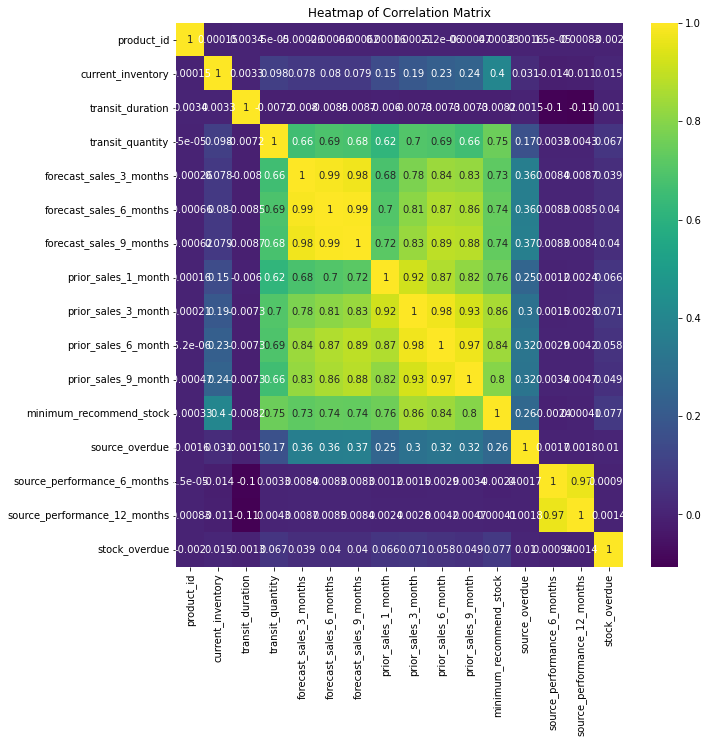

In [ ]:
#finding the correlations


fig = plt.subplots(figsize=(10, 10))
col_corr = df.corr()
ax = sns.heatmap(col_corr, annot = True,cmap='viridis')
plt.title("Heatmap of Correlation Matrix")
plt.show()

ax.figure.savefig('corr.png', dpi=1000,bbox_inches='tight')

In [ ]:
#View the range and distribution through the violinplots
sns.violinplot(df.transit_duration).set(title='Transit Duration Range and Distribution')

NameError: ignored